# 各都道府県への国籍別外国人訪問者数データにもとづく可視化

In [5]:
import pandas as pd
foreign_visitors = pd.read_csv('forign_visitors.csv', encoding='ms932', sep=',',skiprows=0)
foreign_visitors

,都道府県名,年,国籍,年間訪問者数,第1四半期,第2四半期,第3四半期,第4四半期
0,東京都,2012,韓国,730331,195991,157109,194386,182845
1,東京都,2012,中国,845709,202204,240194,326725,76586
2,東京都,2012,台湾,615463,123455,169409,180846,141753
3,東京都,2012,香港,251594,56710,65129,66242,63513
4,東京都,2012,タイ,144820,30663,43853,22718,47586
...,...,...,...,...,...,...,...,...
1179,茨城県,2019,イタリア,927,0,450,196,281
1180,茨城県,2019,ロシア,414,0,414,0,0
1181,茨城県,2019,カナダ,1405,278,1127,0,0
1182,茨城県,2019,米国,10927,2449,3536,2208,2734


# 演習1.
**1) 年間訪問者数の年別推移を折れ線グラフで表示せよ**


 

**構文**

---
```python
import matplotlib.pyplot as plt 　->　matplotlibを使う宣言
plt.plot(x, y) -> 折れ線グラフを描く関数 x: 時間軸の配列 y:時間軸での値の配列　xとyの要素数は一致する必要がある
plt.show() -> グラフを可視化する
```
---
外国人訪問者数の推移

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: 年, dtype: int64
0     6433694
1     7403129
2    10704247
3    21869786
4    23995527
5    26545820
6    28312596
7    29345785
Name: 年間訪問者数, dtype: int64


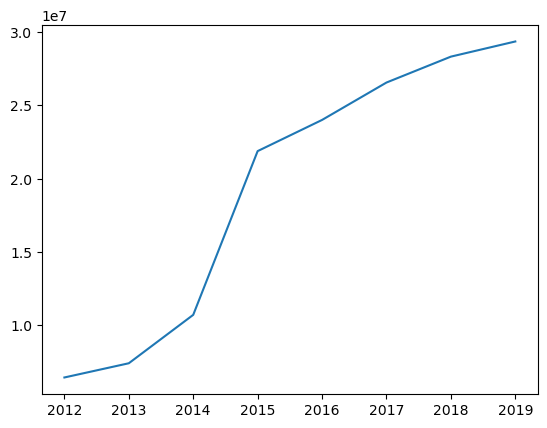

In [2]:
import matplotlib.pyplot as plt
anual_visitors = foreign_visitors.groupby('年',as_index=False).sum(numeric_only=True)
x = anual_visitors['年']
y = anual_visitors['年間訪問者数']
print(x)
print(y)
plt.plot(x, y)
plt.show()

**2015年の伸びが顕著**  

2015年の訪日外国人客数は1,973万7,409人で、前年比では47.1%増と大きな伸びを記録しました。当時の過去最高となっています。
これほどの伸びを記録した主な要因としては、円安が続いた為替市場の動きや燃油サーチャージ値下げによる航空運賃低下、消費免税制度の拡充などの経済的要因に加え、ビザ発行要件の緩和、航空路線の拡大などの社会的要因があると考えられています。  
https://honichi.com/news/2019/07/24/inbounddata/#:~:text=%E3%81%93%E3%81%93%E6%95%B0%E5%B9%B4%E3%81%AE%E8%A8%AA%E6%97%A5,%E5%A2%97%E5%8A%A0%E3%82%92%E7%A4%BA%E3%81%97%E3%81%BE%E3%81%97%E3%81%9F%E3%80%82

**2) 上記と同様に年間訪問者数の推移を米国、中国それぞれ表示せよ**

In [3]:
visit_byNation = foreign_visitors.groupby(['国籍','年'],as_index=False).sum(numeric_only=True)
visit_byNation

,国籍,年,年間訪問者数,第1四半期,第2四半期,第3四半期,第4四半期
0,イタリア,2015,188418,28004,44314,65627,50473
1,イタリア,2016,229881,37403,59157,76855,56466
2,イタリア,2017,242537,40170,69152,72322,60893
3,イタリア,2018,328177,56658,87882,107539,76098
4,イタリア,2019,286313,43683,88381,90588,63661
...,...,...,...,...,...,...,...
143,香港,2015,960109,217717,227796,248600,265996
144,香港,2016,1266659,291868,306240,341054,327497
145,香港,2017,1563166,360239,427627,389007,386293
146,香港,2018,1587829,358055,415693,427300,386781


**グラフを重ねて表示**

**構文**

---
```python
import matplotlib.pyplot as plt 　->　matplotlibを使う宣言

グラフを関数を必要なだけ書く

plt.show() -> グラフを可視化する（上記のグラフを重ね合わせて表示する）
```
---

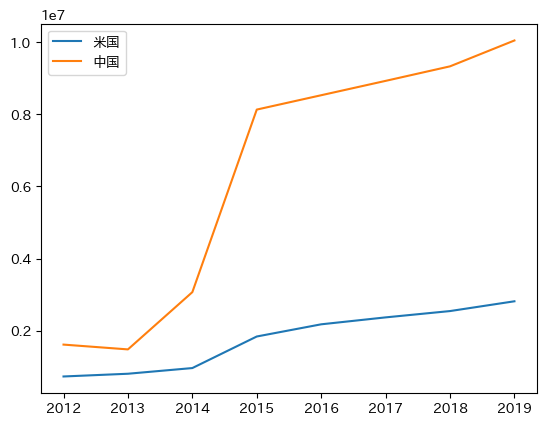

In [4]:
import japanize_matplotlib
us = visit_byNation[visit_byNation['国籍'] == '米国' ]
ch = visit_byNation[visit_byNation['国籍'] == '中国' ]
x = us['年']
y = us['年間訪問者数']
plt.plot(x, y,label='米国')
x = ch['年']
y = ch['年間訪問者数']
plt.plot(x, y,label='中国')
plt.legend()
plt.show()

**3) 年間訪問者数の推移を国籍別に表示せよ**  
演習1．2) のvisit_byNation を用いること

**構文** 

---
```python
import seaborn as sns
sns.relplot(x=DataFrameの時間軸のカラム名, y=DataFrameで時間毎に表示したいカラム名,  data=,DataFrame名, kind="line",  hue=重ねたいグラフの凡例)
```
---

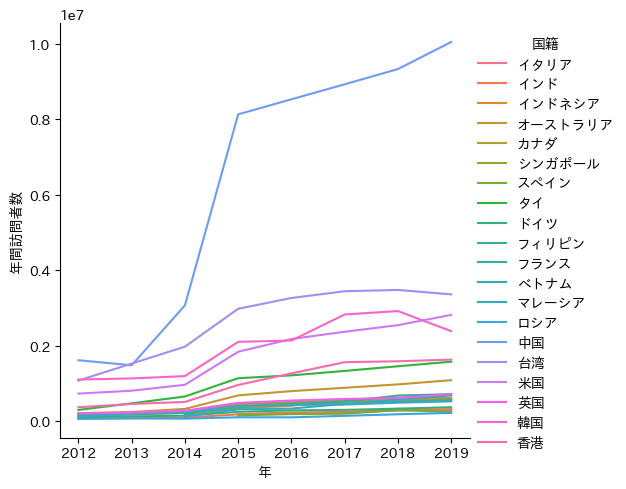

In [5]:
import seaborn as sns
import japanize_matplotlib

sns.relplot(x="年", y="年間訪問者数",  data=visit_byNation, kind="line",  hue="国籍")
plt.show()

アジアからの訪問が多いことがわかる。なかでも中国からの訪問者が圧倒的

# 演習2
**1)  2019年の年間訪問者数（を国籍別に棒グラフにせよ(演習1．2) のvisit_byNation を用いること）**

**構文**

---
```python
sns.barplot( x = DataFrameの時間軸のカラム名, y=DataFrameで時間毎に表示したいカラム名,  data=,DataFrame名)
```

---


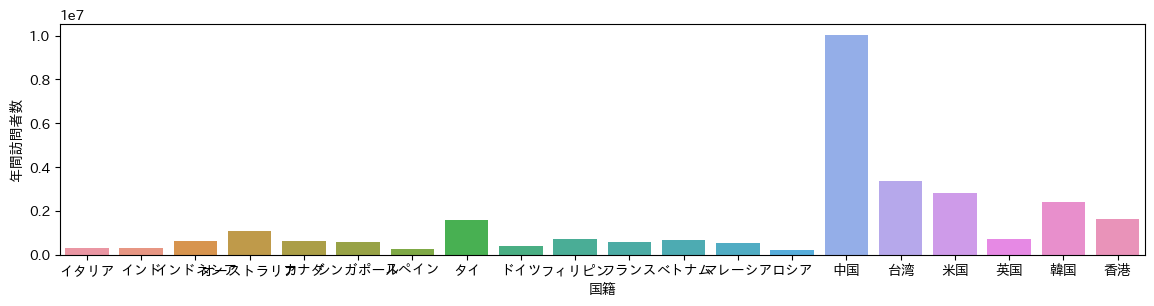

In [6]:
visit_2019 = visit_byNation[visit_byNation['年']==2019]
plt.figure(figsize=[14,3])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019)
plt.show()

**2) 東京の2019年における国籍別訪問者数**
foreign_visitorsを用いて、2019年における東京の国籍別訪問者数を棒グラフにして描け

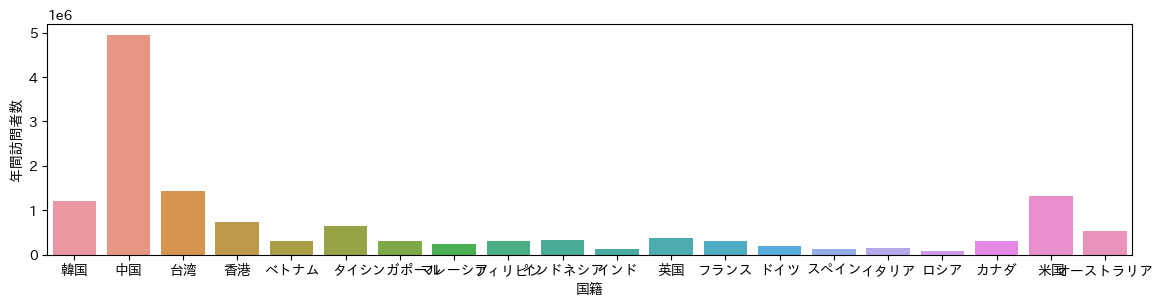

In [7]:
visit_2019_tokyo = foreign_visitors[(foreign_visitors['年']==2019) & (foreign_visitors['都道府県名']=='東京都')]
plt.figure(figsize=[14,3])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019_tokyo)
plt.show()

# 演習3. 複数のグラフ描画区画を用意する
**1) 2019年の国籍別訪問者数を、東京、埼玉、神奈川、千葉それぞれ描画区画を用意して棒グラフで表示せよ**
   
**構文**

---
```python
fig,ax = plt.subplots(グラフ区画の行数,グラフ区画の列数,figsize=(,))

## 上記で定義したグラフ区画数分グラフ描画するコーディングを書く
## この際に、各グラフをどの区画に対応付けるかは、ax=で指定する
　　　例：sns.barplot( ーーーー,ax=ax[0])
```
---

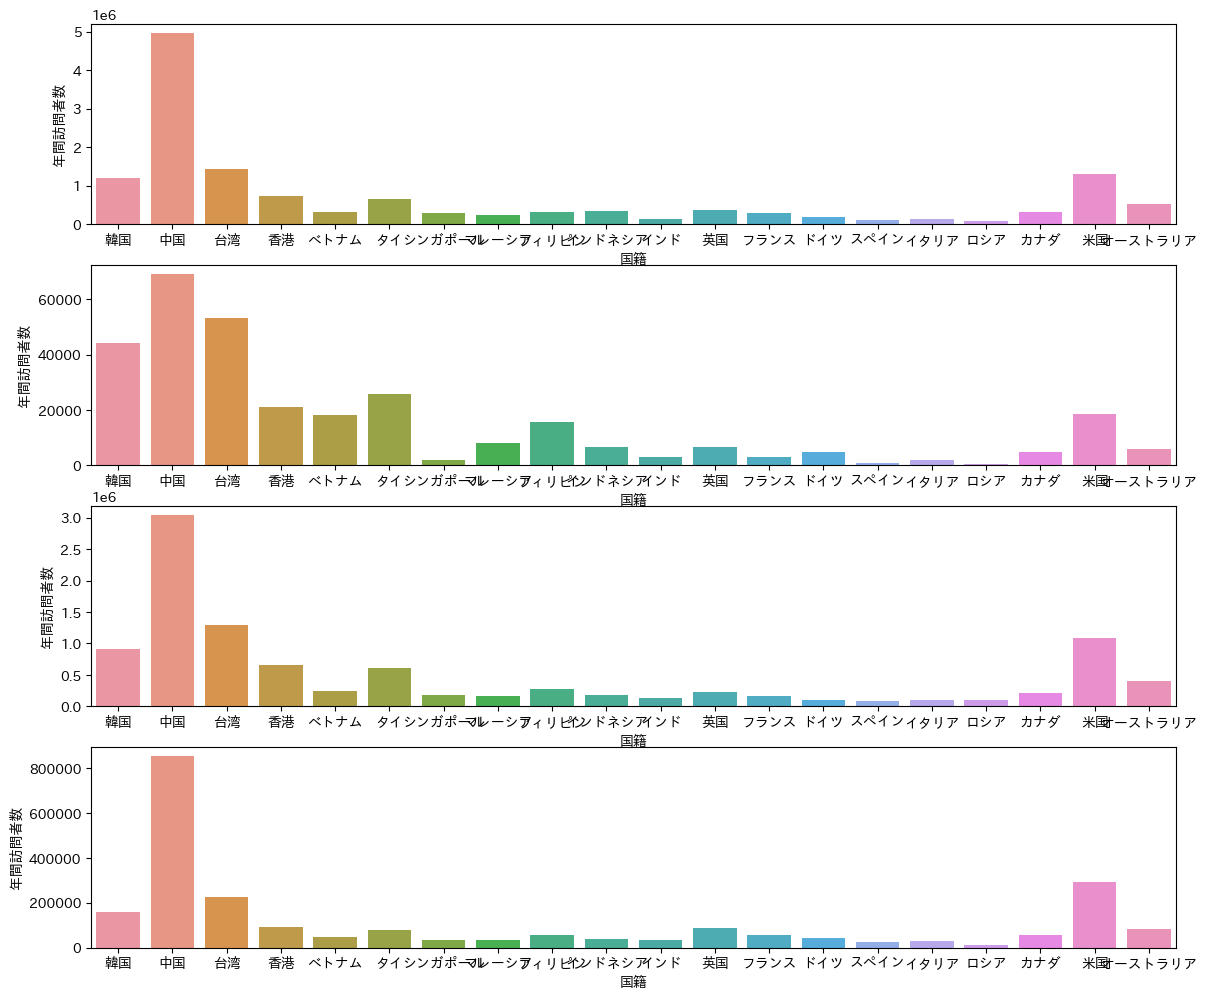

In [8]:
fig,ax = plt.subplots(4,1,figsize=(14,12))
visit_2019 = foreign_visitors[foreign_visitors['年']==2019]
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='東京都'],ax=ax[0])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='埼玉県'],ax=ax[1])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='千葉県'],ax=ax[2])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='神奈川県'],ax=ax[3])
plt.show()

- 全般に中国人訪問者数が突出しているが、埼玉県だけ、アジア系訪問数がおしなべて多い

**2) 上記の図のY軸をすべて5000000にそろえよ**

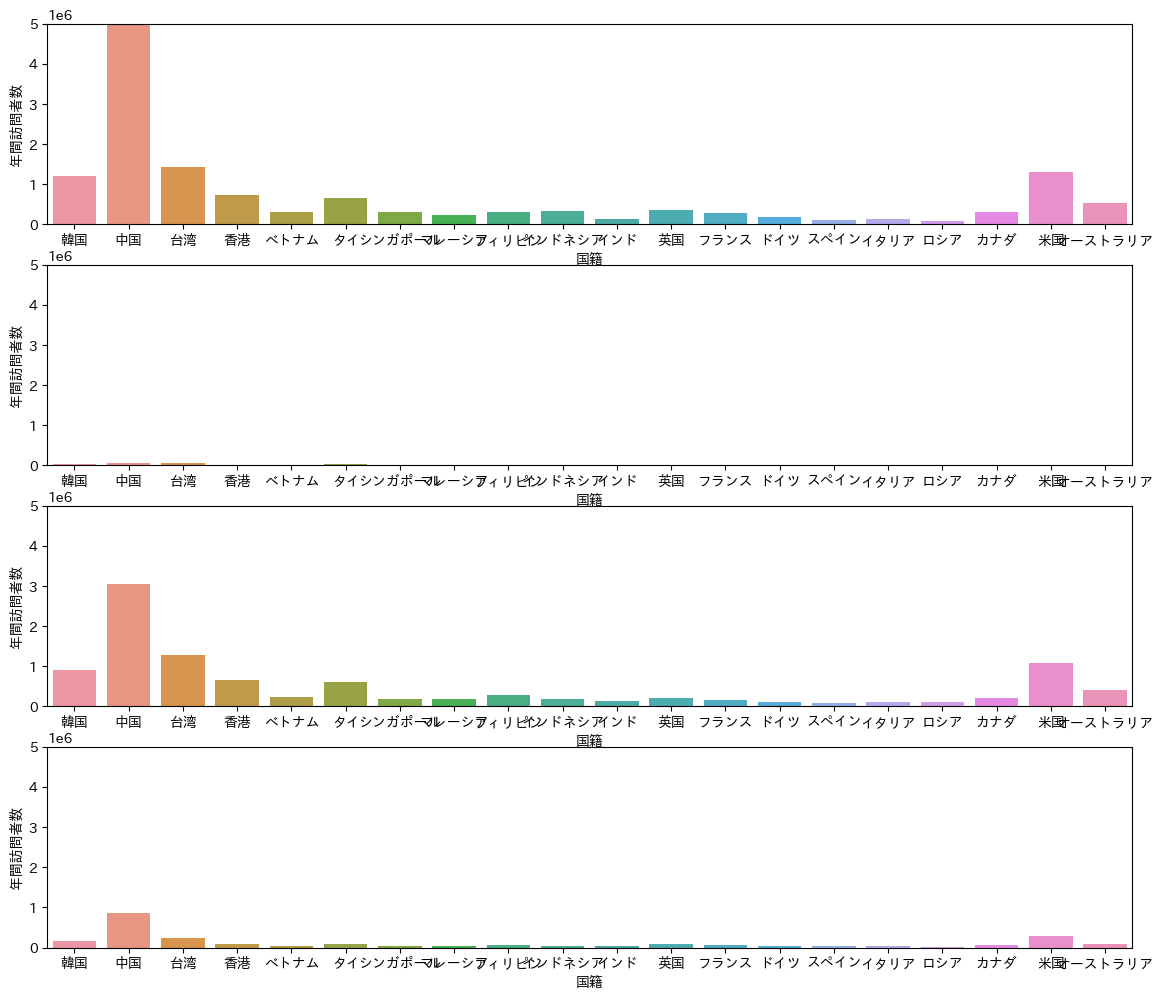

In [10]:
fig,ax = plt.subplots(4,1,figsize=(14,12))

visit_2019 = foreign_visitors[foreign_visitors['年']==2019]
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='東京都'],ax=ax[0])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='埼玉県'],ax=ax[1])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='千葉県'],ax=ax[2])
sns.barplot( x = "国籍", y = "年間訪問者数",data=visit_2019[visit_2019['都道府県名']=='神奈川県'],ax=ax[3])
ax[0].set_ylim(0, 5000000)
ax[1].set_ylim(0, 5000000)
ax[2].set_ylim(0, 5000000)
ax[3].set_ylim(0, 5000000)
plt.show()